In [1]:
import pandas as pd

In [2]:
base = pd.read_csv(r'C:/Users/carol/Downloads/creditcard.csv')

In [3]:
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
X = base.drop('Class',axis = 1)
y = base.Class

In [5]:
#para visualizar os valores de y
y.value_counts()/y.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
X.shape

(284807, 30)

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [11]:
#verificando o y de treino
y_train.value_counts()/y_train.shape[0]

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [13]:
#verificando o y de teste
y_test.value_counts()/y_test.shape[0]

0    0.998276
1    0.001724
Name: Class, dtype: float64

In [14]:
#utilizando a árvore de decisão para criar um modelo com seletor = 10

from sklearn.feature_selection import SelectKBest
seletor = SelectKBest(k = 10)

In [16]:
#fazendo o fit com os dados de treino
seletor = seletor.fit(X_train,y_train)

In [17]:
seletor.transform(X_train)

array([[-0.5373172 , -0.91976418, -0.97489855, ...,  1.50600338,
        -0.17825182, -0.97053677],
       [ 1.27452953,  1.34801689, -0.59191994, ...,  0.10043582,
        -0.22043114, -0.00357948],
       [-1.80333274,  0.38520687,  0.0722869 , ...,  0.37203897,
         0.55020954, -0.17005534],
       ...,
       [ 1.58156778, -0.02428591,  0.60921201, ..., -1.87993724,
         1.24154117, -2.62321076],
       [ 0.49654001,  1.50531804,  0.10055102, ..., -0.79691297,
         0.40479457, -1.03306098],
       [ 1.8233943 ,  0.31299051,  0.49935058, ..., -0.9951504 ,
         0.51705177, -1.11336176]])

In [18]:
seletor.transform(X_train).shape

(190820, 10)

In [24]:
# verificando as colunas
colunas = seletor.get_feature_names_out()

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier(random_state=0)

In [27]:
X_train_best = X_train.loc[:,colunas]

In [28]:
clf = clf.fit(X_train_best,y_train)

In [29]:
X_test_best = X_test.loc[:,colunas]

In [30]:
y_pred = clf.predict(X_test_best)

In [31]:
from sklearn.metrics import f1_score

In [33]:
f1_score(y_test,y_pred)

0.7371794871794872

#### percorrendo os valores de k avaliando o f1_score

In [37]:
k = []
f1 = []

for i in range(1,len(X_train.columns)+ 1):
    
    seletor = SelectKBest(k = i)
    seletor = seletor.fit(X_train,y_train)
    colunas = seletor.get_feature_names_out()
    
    clf = DecisionTreeClassifier(random_state=0)
    X_train_best = X_train.loc[:,colunas]
    clf = clf.fit(X_train_best,y_train)
    X_test_best = X_test.loc[:,colunas]
    y_pred = clf.predict(X_test_best)
    
    f1_k = f1_score(y_test,y_pred)
    
    print(i,colunas,f1_k)
    
    k.append(i)
    f1.append(f1_k)

1 ['V17'] 0.5696594427244581
2 ['V14' 'V17'] 0.694267515923567
3 ['V12' 'V14' 'V17'] 0.6873065015479877
4 ['V10' 'V12' 'V14' 'V17'] 0.7371794871794872
5 ['V10' 'V12' 'V14' 'V16' 'V17'] 0.7306501547987617
6 ['V3' 'V10' 'V12' 'V14' 'V16' 'V17'] 0.7391304347826086
7 ['V3' 'V7' 'V10' 'V12' 'V14' 'V16' 'V17'] 0.7795527156549522
8 ['V3' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17'] 0.750788643533123
9 ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17'] 0.7594936708860759
10 ['V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18'] 0.7371794871794872
11 ['V1' 'V3' 'V4' 'V7' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18'] 0.7368421052631579
12 ['V1' 'V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18'] 0.742671009771987
13 ['V1' 'V3' 'V4' 'V5' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18'] 0.7368421052631579
14 ['V1' 'V2' 'V3' 'V4' 'V5' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17'
 'V18'] 0.75
15 ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16'
 'V17' 'V18'] 0.77

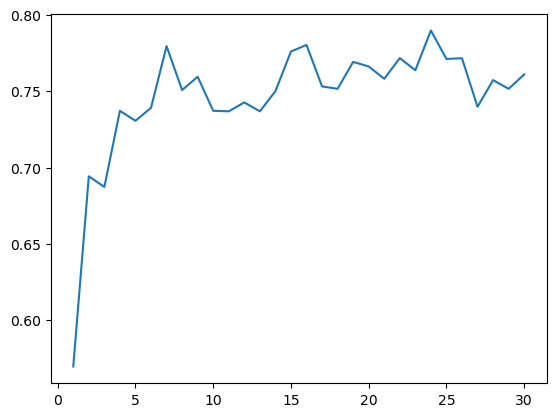

In [38]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot(k, f1)

plt.show()